# Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MultiLabelBinarizer
import ast

# Loading {version 1} csv files of flats,independnet houses and apartments
flats_df = pd.read_csv('Cleaned_datasets/Clean_Flats_V1.csv')
Ih_df = pd.read_csv('Cleaned_datasets/Cleaned_IH_V1.csv')
Appartment_df = pd.read_csv('Raw_data/appartments.csv') 

### ▶️ Concatenating the dataframes

In [2]:
# Reseting the index
flats_df.reset_index(drop=True,inplace=True)
Ih_df.reset_index(drop=True,inplace=True)

# Concatinating both the dataframes
df = pd.concat([flats_df,Ih_df],ignore_index=True)

In [3]:
# Making sure we are getting full view of the rows and columns of the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Exploratory data analysis

In [4]:
# Checking shape of the dataframe
df.shape

(3961, 20)

In [5]:
# Checking features information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    3961 non-null   object 
 1   Property_Type    3961 non-null   object 
 2   society          3960 non-null   object 
 3   price            3942 non-null   float64
 4   Price_Per_SQFT   3961 non-null   float64
 5   Area             3942 non-null   float64
 6   areaWithType     3961 non-null   object 
 7   bedRoom          3961 non-null   object 
 8   bathroom         3961 non-null   object 
 9   balcony          3961 non-null   object 
 10  additionalRoom   3961 non-null   object 
 11  address          3950 non-null   object 
 12  floorNum         3961 non-null   int64  
 13  facing           2784 non-null   object 
 14  agePossession    3960 non-null   object 
 15  nearbyLocations  3754 non-null   object 
 16  description      3961 non-null   object 
 17  furnishDetails

### ▶️ Visualizing the missing values (Using barplot and matrix plot)
For visualizing the missing values even thought both the bar plot and the matrix plot can be used but we should be very much carefully while using the matrix plot as sometimes if the missing values are very very less then there are high chances that our naked eyes might not be able to detect them using the matrix plot so should focus more on the barplot.

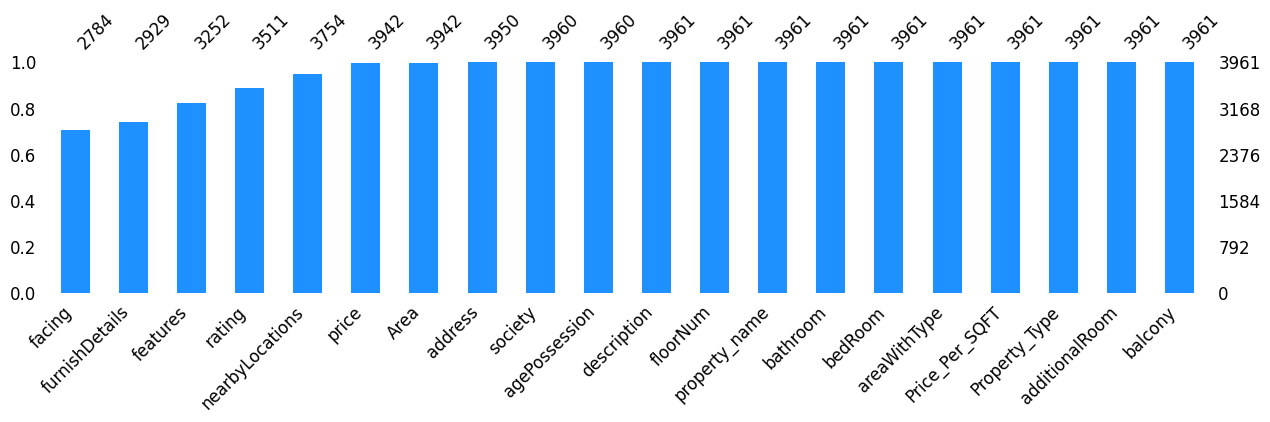

In [6]:
# Checking any null values
msno.bar(df, figsize=(15, 3), color="dodgerblue", sort="ascending", fontsize=12)
plt.show()

<AxesSubplot: >

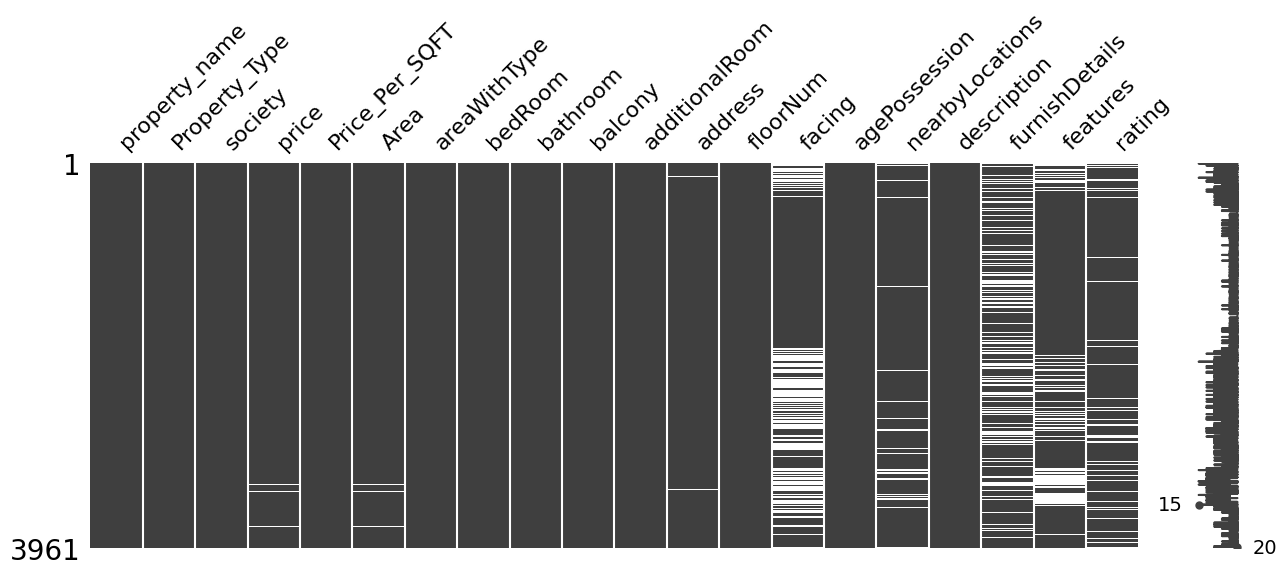

In [7]:
# Visualizing the missing values using the matrix plot
msno.matrix(df,figsize=(15,5))

### ▶️ Detecting the duplicate values

In [8]:
if df.duplicated().sum() == 0:
    print("No duplicate values")
else:
    print("Removed duplicates")
    df.drop_duplicates(inplace=True)

No duplicate values


### ▶️ Extracting sector number form property name and only considering sectors with freq>3

In [9]:
# Extracting secotor number from the property namea and create a new feature with name sector
df.insert(loc=3,column='sector',value=df['property_name'].str.split('in').str.get(1).str.replace('Gurgaon','').str.strip())

# Lowercasing the values to avoid any duplicate values
df['sector'] = df['sector'].str.lower()

In [10]:
# Filter the dataframe to include only sectors with a count of 3 or more
sectors_to_keep = df['sector'].value_counts()[df['sector'].value_counts() >= 3].index
df = df[df['sector'].isin(sectors_to_keep)]

### ▶️ Making the sector names consistent

In [11]:
replacements = {
    'sector 95a': 'sector 95',
    'sector 23a': 'sector 23',
    'sector 12a': 'sector 12',
    'sector 3a': 'sector 3',
    'sector 110 a': 'sector 110',
    'patel nagar': 'sector 15',
    'a block sector 43': 'sector 43',
    'maruti kunj': 'sector 12',
    'b block sector 43': 'sector 43',
    'sector-33 sohna road': 'sector 33',
    'sector 1 manesar': 'manesar',
    'sector 4 phase 2': 'sector 4',
    'sector 1a manesar': 'manesar',
    'c block sector 43': 'sector 43',
    'sector 89 a': 'sector 89',
    'sector 2 extension': 'sector 2',
    'sector 36 sohna road': 'sector 36',
    'sector 37d': 'sector 37',
    'sector 70a': 'sector 70',
    'sector 37c': 'sector 33',
    'sector-33 sohna': 'sector 33',
    'sector 99a': 'sector 99',
    'sector 88a': 'sector 88',
    'sector 67a': 'sector 67',
    'sector 82a': 'sector 82',
    'sector 63a': 'sector 63',
    'sector 36a': 'sector 36',
    'sector 9a': 'sector 9',
    'sector 10a': 'sector 10',
    'sector 17b': 'sector 17',
    'sector 17a': 'sector 17',
    'sector 88b': 'sector 88',
    'sector-2 sohna': 'sector 2',
    'sector 37a': 'sector 37',
    'near sector 1 market': 'sector 1',
    'sector-35 sohna': 'sector 35',
    'new colony, sector 7': 'sector 7',
    'civil l': 'sector 1',
    'block g sector-57': 'sector 57',
    'anand garden, sector-105': 'sector 105',
    'sector 9b': 'sector 9b',
    'mg road': 'sector 25',
    'a block sushant lok phase 1': 'sector 26',
    'prem nagar': 'sector 13',
    'b block sushant lok phase 1': 'sector 40',
    'gandhi nagar': 'sector 11',
    'laxmi garden': 'sector 11',
    'shakti nagar': 'sector 11',
    'vishnu garden': 'sector 105',
    'sohna': 'sector 1',
    'nirvana country': 'sector 50',
    'dlf phase 2': 'sector 25',
    'dlf phase 1': 'sector 25',
    'dlf phase 3': 'sector 24',
    'dlf phase 4': 'sector 24',
    'dlf phase 5': 'sector 53',
    'palam vihar': 'sector 1',
    'laxman vihar': 'sector 3',
    'sushant lok phase 1': 'sector 43',
    'vishnu garden': 'sector 105',
    'sector 3 phase 2': 'sector 3',
    'sector 1 road': 'sector 1',
    'south city 1': 'sector 1',
    'c block sector 43': 'sector 43',
    'sector 36 sector 1': 'sector 36',
    'sector 1 imt manesar': 'sector 1',
    'sector 1a imt manesar': 'sector 1',
    'new sector 1': 'sector 1',
    'new': 'sector 1',
    'imt manesar': 'sector 1',
    'suncity': 'sector 54',
    'surya vihar': 'sector 21',
    'adarsh nagar': 'sector 12',
    'valley view estate': 'sector 58',
    'bhondsi': 'sector 68',
    'dharam colony': 'sector 12',
    'shivaji nagar': 'sector 11',
    'madanpuri': 'sector 7',
    'shivpuri': 'sector 7',
    'devilal colony': 'sector 9',
    'bhim nagar': 'sector 6',
    'ravi nagar': 'sector 9',
    'krishna colony': 'sector 7',
    'baldev nagar': 'sector 7',
    'dharam colony': 'sector 12',
    'garhi harsaru': 'sector 93',
    'manesar': 'sector 1',
    'subhash nagar': 'sector 6',
    'dayanand colony': 'sector 6',
    'greenwood city': 'sector 45',
    'chakkarpur': 'sector 18',
    'sushant lok phase 2': 'sector 55',
    'saraswati vihar': 'sector 28',
    'ansal plaza': 'sector 1',
    'arjun nagar': 'sector 8',
    'rajiv nagar': 'sector 13',
    'jacobpura': 'sector 12',
    'jyoti park': 'sector 7',
    'ashok vihar': 'sector 3',
    'sector 1 colony': 'sector 1',
    'surat nagar 1': 'sector 104',
    'mianwali colony': 'sector 12',
    'dwarka expressway': 'sector 99',
    'malibu town': 'sector 47',
    'mehrauli  road': 'sector 28',
    'sector 1 extension': 'sector 1',
    'sector 3 phase 2': 'sector 3',
    'sector 3 phase 3 extension': 'sector 3',
    'uppals southend': 'sector 49',
    'rajendra park': 'sector 105',
    'sushant lok phase 3': 'sector 57',
    'gwal pahari': 'sector 55',
    'sector 36 sohna' : 'sector 36'
}

df['sector'].replace(replacements, inplace=True)

In [12]:
# Removing some irrelevent areas 
locations = [
    'laxman vihar phase 2', 'ashok vihar phase 2', 'new palam vihar', 
    'new colony', 'ashok vihar phase 3 extension', 'c block sushant lok phase', 
    'palam vihar extension','c block sushant lok phase 1'
]

df = df[~df['sector'].isin(locations)]

### ▶️ Standardizing the area feature
- Upon careful observation of the areaWithType feature, we discern four distinct types of areas mentioned: Plot area, Carpet area, Built-up area, and Super built-up area.

- The Area feature exhibits inconsistencies; while some rows indicate carpet area, others detail different types of area. Consequently, this feature lacks reliability. Instead, we aim to leverage the areaWithType feature to extract all four area types and generate corresponding new features.

- In instances where the Property_Type is labeled as Independent_House, missing values emerge across the newly created features. This occurrence stems from the absence of carpet area, built-up area, or super built-up area in independent houses, as they primarily possess a plot area. Hence, our task involves extracting the plot area from the areaWithType feature and converting it into square footage.

In [13]:
df[['Area','areaWithType']].sample(5)

,Area,areaWithType
1775,1569.0,Super Built up area 1568(145.67 sq.m.)
3897,4500.0,Built Up area: 4500 (418.06 sq.m.)
827,1609.0,Super Built up area 1608(149.39 sq.m.)
1466,2164.0,Super Built up area 2164(201.04 sq.m.)
2567,690.0,Carpet area: 690 (64.1 sq.m.)


In [18]:
class Extract_featres_Area:
    """
    This class will be used to extract new features from existing areaWithTYpe feature and
    it will also help us to convert sq.m to sq.ft
    """

    # This function extracts the Super Built up area
    def get_super_built_up_area(self,text):
        match = re.search(r'Super Built up area (\d+\.?\d*)', text)
        if match:
            return float(match.group(1))
        return None

    # This function extracts the Built Up area or Carpet area
    def get_area(self,text, area_type):
        match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
        if match:
            return float(match.group(1))
        return None
    
    # Function to extract plot area from 'areaWithType' column
    def extract_plot_area(self,area_with_type):
        match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
        if match:
            return float(match.group(1))
        else:
            None

    # This function checks if the area is provided in sq.m. and converts it to sqft if needed
    def convert_to_sqft(self,text, area_value):
        if area_value is None:
            return None
        match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
        if match:
            sq_m_value = float(match.group(1))
            return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
        return area_value
    
    
    # This method will convert the built_up_area of indpendent houses to sqft
    def convert_scale(self,row):
        if np.isnan(row['Area']) or np.isnan(row['built_up_area']):
            return row['built_up_area']
        else:
            if round(row['Area']/row['built_up_area']) == 9.0:
                return row['built_up_area'] * 9
            elif round(row['Area']/row['built_up_area']) == 11.0:
                return row['built_up_area'] * 10.7
            else:
                return row['built_up_area']

In [19]:
# Instantiating the class
clean_area = Extract_featres_Area()

# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(clean_area.get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: clean_area.convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: clean_area.get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: clean_area.convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: clean_area.get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: clean_area.convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [20]:
Ind_House_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','Property_Type','Area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

# Extracting Plot area ( Plot area of houses ~ Built up area of flats )
Ind_House_df['built_up_area'] = Ind_House_df['areaWithType'].apply(clean_area.extract_plot_area)

# Convertions of values to sqft
Ind_House_df['built_up_area'] = Ind_House_df.apply(clean_area.convert_scale,axis=1)

# Updating the original dataframe
df.update(Ind_House_df)

### ▶️ Creating new features (Study,servant,store,pooja room and others)
In the `additionalRoom` feature there are a lot of rows having study room, pooja room and store room, so we will be creating 4 binary features where 1 will represent type of additional room present. 

In [16]:
df['additionalRoom'].value_counts().sample(6)

additionalRoom
store room,pooja room                               5
servant room,others,store room,pooja room           2
pooja room,servant room,store room                  7
not available                                    1581
pooja room,store room,servant room                  1
store room,pooja room,servant room,study room       1
Name: count, dtype: int64

In [21]:
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col, case=False, regex=False).astype(int)

### ▶️ Replacing values in age posession feature with more meaningful values
The `agePossession` feature has high cardinatlity so to deal with this type we will replace the values with new values such that the overall information is preserved.

In [19]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if any(keyword in value for keyword in ["0 to 1 Year Old", "Within 6 months", "Within 3 months"]):
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if any(keyword in value for keyword in ["Under Construction", "By"]):
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

### ▶️ Creating new features for furnishing details using clustering

In [25]:
# Let's extract all unique furnishings from the furnishDetails column
unique_furnishings = set(df['furnishDetails'].dropna().apply(lambda detail: detail.replace('[', '').replace(']', '').replace("'", "").split(', ')).sum())

# Defining a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

#Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings if furnishing]

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df.loc[:, ['furnishDetails'] + columns_to_include]

In [27]:
# Let's see how the dataframe looks like
furnishings_df.head(4)

# Dropping the first feature so that we could create clusters
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

In [28]:
# Scaling the data points to common scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

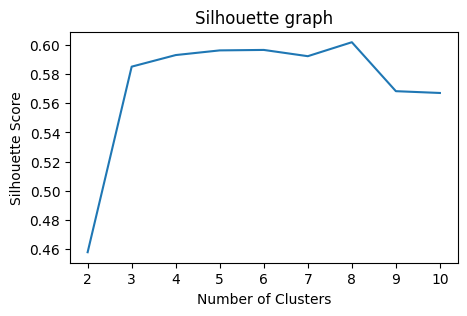

In [29]:
# Empty list to score silhouette score
silhouette_sc = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i,random_state=0,n_init=10,init='k-means++')
    kmeans.fit(scaled_data)
    labels = kmeans.predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_sc.append(silhouette_avg)
    
fig,ax = plt.subplots(figsize=(5,3))

plt.plot(range(2, 11), silhouette_sc)
plt.title('Silhouette graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [30]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init='auto')
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [31]:
# Selecting all the features other than furnish detials count
df = df.iloc[:,:-18]

# Creating a new feature where  0 -> unfurnished, 1 -> semifurnished and 2 -> furnished
df['furnishing_type'] = cluster_assignments

### ▶️Extracting the facilities from apartment dataframe

In [33]:
Appartment_df.head(4)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...","{'Bajghera Road': '800 Meter', 'Palam Vihar Ha...",https://www.99acres.com/smartworld-one-dxp-sec...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa'..."
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap Un...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...",https://www.99acres.com/m3m-crown-sector-111-g...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Bowling Alley', 'Mini Theatre', 'Manicured G..."
2,Adani Brahma Samsara Vilasa,"Land, 3, 4 BHK Independent Floor in Sector 63,...","['AIPL Business Club Sector 62', 'Heritage Xpe...","{'AIPL Business Club Sector 62': '2.7 Km', 'He...",https://www.99acres.com/adani-brahma-samsara-v...,{'3 BHK': {'building_type': 'Independent Floor...,"['Terrace Garden', 'Gazebo', 'Fountain', 'Amph..."
3,Sobha City,"2, 3, 4 BHK Apartment in Sector 108, Gurgaon","['The Shikshiyan School', 'WTC Plaza', 'Luxus ...","{'The Shikshiyan School': '2.9 KM', 'WTC Plaza...",https://www.99acres.com/sobha-city-sector-108-...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Volley Ball Court', 'Aerobi..."


In [34]:
# Lowering the property name
Appartment_df['PropertyName'] = Appartment_df['PropertyName'].str.lower()

# Accessing all the rows having null feature values
Null_feature_df = df[df['features'].isnull()]

# Performing the left join
x = Null_feature_df.merge(Appartment_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

# Filling missing values in feature column with new values
df.loc[Null_feature_df.index,'features'] = x.values

In [35]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

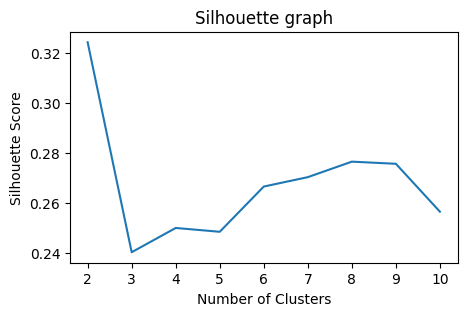

In [36]:
# Empty list to score silhouette score
silhouette_sc = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i,random_state=0,n_init=10,init='k-means++')
    kmeans.fit(features_binary_df)
    labels = kmeans.predict(features_binary_df)
    silhouette_avg = silhouette_score(features_binary_df, labels)
    silhouette_sc.append(silhouette_avg)
    
fig,ax = plt.subplots(figsize=(5,3))

plt.plot(range(2, 11), silhouette_sc)
plt.title('Silhouette graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [37]:
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

# Creating a new feature
df['luxury_score'] = luxury_score

In [38]:
# Dropping all the unnecessary columns
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom','Area','areaWithType'],inplace=True)

In [39]:
# Saving current state of data in the csv file
df.to_csv('Cleaned_datasets/Combined_CleanData_V2.csv',index=False)